###TALLER 28/04/2025
De acuerdo a lo aprendido, llenar los espacios perdidos de embarcamiento y tarifa. Sacar conclusiones y responder las siguientes preguntas:

In [1]:
!pip install pandas matplotlib seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
Url = "https://raw.githubusercontent.com/nt246/NTRES-6100-data-science/master/datasets/Titanic.csv"
df=pd.read_csv(Url)
titanic = df
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##1er punto
Según Wikipedia, se calcula que había 2,224 pasajeros y tripulantes a bordo del Titanic cuando se hundió. ¿De cuántos de ellos tenemos información en este conjunto de datos? De las personas de las que tenemos datos, ¿cuántas sobrevivieron y cuántas no? ¿Cuál es la tasa global de supervivencia?


In [8]:
# Cantidad de registros
total_datos = titanic.shape[0]

# Cuántos sobrevivieron y cuántos no
sobrevivientes = titanic['Survived'].sum()
no_sobrevivientes = total_datos - sobrevivientes

# Tasa global de supervivencia
tasa_supervivencia = sobrevivientes / total_datos * 100

print(f"Total de datos: {total_datos}")
print(f"Sobrevivientes: {sobrevivientes}")
print(f"No sobrevivientes: {no_sobrevivientes}")
print(f"Tasa global de supervivencia: {tasa_supervivencia:.2f}%")

Total de datos: 891
Sobrevivientes: 342
No sobrevivientes: 549
Tasa global de supervivencia: 38.38%


##2do Punto
¿Cuántos pasajeros del Titanic eran hombres y cuántos mujeres? ¿Qué se obtiene cuando se desglosa por clase de billete?


In [11]:
# Conteo por sexo
conteo_sexo = titanic['Sex'].value_counts()

# Conteo por clase y sexo
conteo_clase_sexo = titanic.groupby(['Pclass', 'Sex']).size()

print(conteo_sexo)
print(conteo_clase_sexo)


Sex
male      577
female    314
Name: count, dtype: int64
Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
dtype: int64


##3er punto
¿Cuántos pasajeros de cada sexo sobrevivieron y cuántos no? ¿Cuál es la tasa de supervivencia de los pasajeros de cada sexo?

In [18]:
# Sobrevivencia por sexo
sobrevivencia_sexo = titanic.groupby(['Sex', 'Survived']).size().unstack()

# Tasa de supervivencia por sexo
tasa_supervivencia_sexo = sobrevivencia_sexo.div(sobrevivencia_sexo.sum(axis=1), axis=0) * 100

print('Tenemos en cuenta que 0 es no sobreviviente y 1 son sobrevivientes')
print(sobrevivencia_sexo)
print('Tasa de superviviencia en %')
print(tasa_supervivencia_sexo)

Tenemos en cuenta que 0 es no sobreviviente y 1 son sobrevivientes
Survived    0    1
Sex               
female     81  233
male      468  109
Tasa de superviviencia en %
Survived          0          1
Sex                           
female    25.796178  74.203822
male      81.109185  18.890815


##4to Punto
¿De cuántos pasajeros tenemos información sobre la edad (incluida la edad estimada)? ¿Para cuántos falta información sobre la edad? ¿Cuál es la distribución por edades de los pasajeros sobre los que se dispone de información?



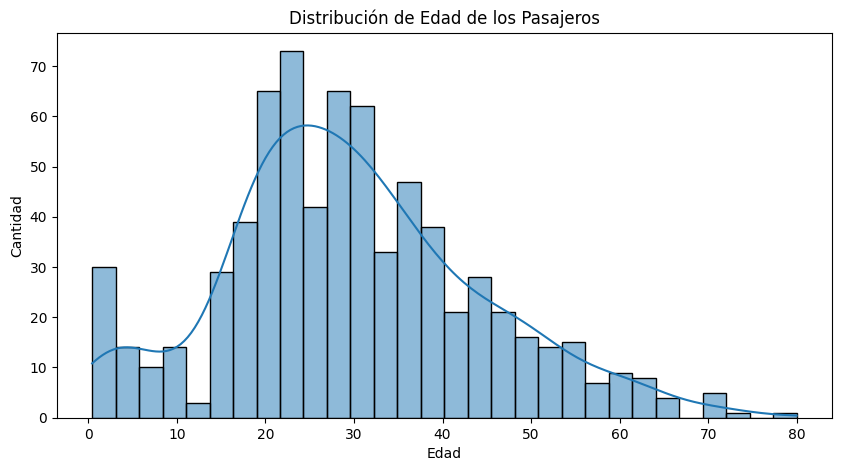

Total de pasajeros con edad: 714
Total de pasajeros: 177


In [24]:
# Cuántos pasajeros tienen edad registrada
pasajeros_con_edad = titanic['Age'].notnull().sum()
pasajeros_sin_edad = titanic['Age'].isnull().sum()

# Distribución de edades
plt.figure(figsize=(10,5))
sns.histplot(titanic['Age'].dropna(), bins=30, kde=True)
plt.title('Distribución de Edad de los Pasajeros')
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.show()

print('Total de pasajeros con edad:', pasajeros_con_edad)
print('Total de pasajeros:', pasajeros_sin_edad)

##5to Punto
Muestre la distribución de edad por clase de billete, por sexo. ¿Qué encuentra?



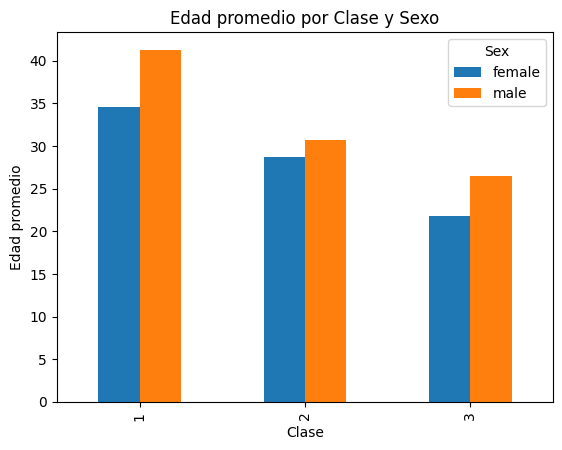

In [29]:
avg_age = df.groupby(['Pclass', 'Sex'])['Age'].mean().unstack()
avg_age.plot(kind='bar')
plt.title('Edad promedio por Clase y Sexo')
plt.xlabel('Clase')
plt.ylabel('Edad promedio')
plt.show()

Encontramos que en edad promedio los hombres segun la clase de billete eran mayores a las mujeres

##6to Punto
¿Cómo afectan el sexo, la clase de billete y la edad de un pasajero a sus posibilidades de sobrevivir? Intenta utilizar un único gráfico para responder a esta pregunta.


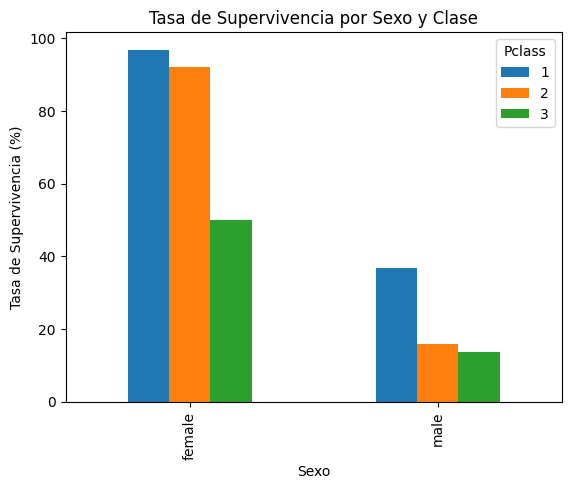

In [30]:
# Tasa de supervivencia por sexo y clase
survival_group = df.groupby(['Sex', 'Pclass'])['Survived'].mean().unstack() * 100
survival_group.plot(kind='bar')
plt.title('Tasa de Supervivencia por Sexo y Clase')
plt.xlabel('Sexo')
plt.ylabel('Tasa de Supervivencia (%)')
plt.show()


##7mo Punto
Indique la distribución del número de miembros de la familia (incluidos hermanos, cónyuges, padres e hijos) que acompañaban a cada pasajero. ¿La mayoría de los pasajeros viajaban solos o con familia?


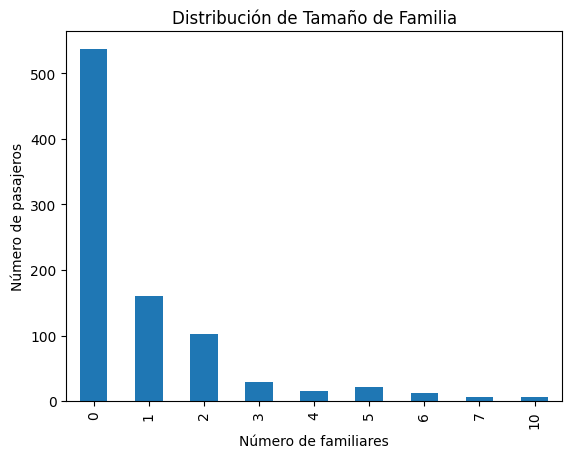

In [31]:
df['FamilySize'] = df['SibSp'] + df['Parch']

family_size_counts = df['FamilySize'].value_counts().sort_index()
family_size_counts.plot(kind='bar')
plt.title('Distribución de Tamaño de Familia')
plt.xlabel('Número de familiares')
plt.ylabel('Número de pasajeros')
plt.show()

Como podemos observar la mayoria de pasajeros iban solos

##8vo Punto
¿En qué clase de billete viajaban la mayoría de las familias numerosas? ¿Y qué clase de billete tiene la menor proporción de pasajeras que viajaron solas de entre todas las pasajeras de esta clase?


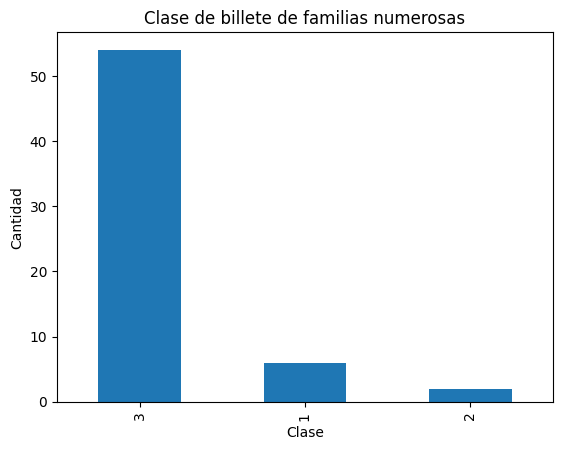

In [32]:
large_families = df[df['FamilySize'] >= 4]
pclass_large_families = large_families['Pclass'].value_counts()

pclass_large_families.plot(kind='bar')
plt.title('Clase de billete de familias numerosas')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.show()

En este caso asumimos como familias numerosas aquellas que se conformaran por mas de 4 miembros y podemos observar que la gran mayoria se encontraba en clase 3

In [43]:
# Filtramos solo pasajeras (females)
women = df[df['Sex'] == 'female'].copy()  # Usamos .copy() para evitar el warning

# De ellas, identificamos si viajaban solas
women['TravelAlone'] = (women['SibSp'] == 0) & (women['Parch'] == 0)

# Calculamos proporción de mujeres solas por clase
prop_alone_by_class = women.groupby('Pclass')['TravelAlone'].mean() * 100  # Convertimos a porcentaje

print(prop_alone_by_class)


Pclass
1    36.170213
2    42.105263
3    41.666667
Name: TravelAlone, dtype: float64


En este caso como podemos observar la clase que tiene la menor proporción de pasajeras que viajaron solas de entre todas las pasajeras de esta clase es la primera clase con un 36.17%

##9no Punto
En este conjunto de datos, la variable Tarifa no representa la tarifa por persona. En cambio, cada número de billete tiene una tarifa correspondiente, y algunos pasajeros comparten un único número de billete. Por lo tanto, la variable Tarifa es la tarifa total de un grupo de pasajeros que comparten el mismo número de billete. Sabiendo esto, calcule la tarifa media por persona. No es necesario que muestres una tabla o una cifra para este apartado, sólo muestra el código para el cálculo.



In [35]:
# Calculamos tarifa media por persona
df['GroupTicketSize'] = df.groupby('Ticket')['Ticket'].transform('count')
df['FarePerPerson'] = df['Fare'] / df['GroupTicketSize']


##10mo Punto
¿Cuál es la distribución de la tarifa por billete para cada clase de billete?

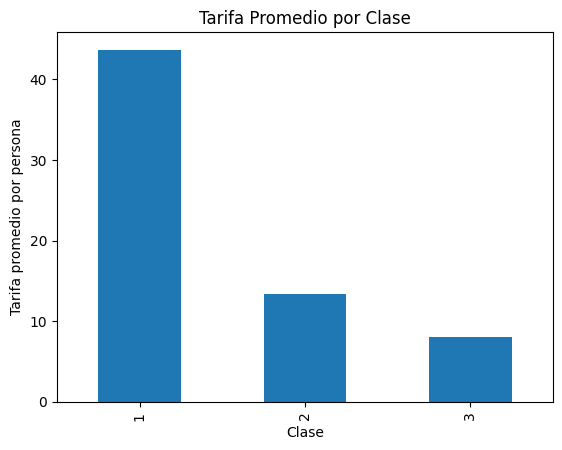

In [36]:
# Tarifa promedio por clase
fare_avg = df.groupby('Pclass')['FarePerPerson'].mean()
fare_avg.plot(kind='bar')
plt.title('Tarifa Promedio por Clase')
plt.xlabel('Clase')
plt.ylabel('Tarifa promedio por persona')
plt.show()


Primera clase tiene tarifas mucho más altas que segunda o tercera clase.